## Inaugural speeches of all US Presidents

Speeches are available in Miller Center's website (https://millercenter.org/the-presidency/presidential-speeches) or from NLTK's "inaugural" corpus. 

In [1]:
# Loading required packages
from nltk.corpus import inaugural,stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist
from string import punctuation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')
stopwords = stopwords.words("english")

Adding the year of the speech to the corpus and president's party affiliation (Democratic, Republican, Other)

In [2]:
# Get list of the US presidents
InauguralSpeeches = pd.read_csv("USpresidents.csv")
num_speeches = len(inaugural.fileids())
print("total number of inaugural speeches:", num_speeches)

total number of inaugural speeches: 58


In [3]:
vocab = []
freq_words = []
sentiment = []
speech_lst = []
analyzer = SentimentIntensityAnalyzer()

for fileid in inaugural.fileids():
    # Clean text to remove punctuation and stop words
    speech = inaugural.raw(fileid)
    speech_lst.append(speech)
    speech = re.sub(r'['+ punctuation + '’—”'+']', "", speech.lower())
    words = speech.split()
    # Vocabulary, most frequently used words and sentiment score for each inaugural speech
    # Vocabulary
    vocab_cnt = len(set(words))
    vocab.append(vocab_cnt)
    # Most frequently used words
    words = [w for w in words if w not in stopwords]
    most_used_words = [word for word,cnt in FreqDist(words).most_common(5)]
    freq_words.append(most_used_words)
    # sentiment
    sentiment_scr = analyzer.polarity_scores(speech)['compound']
    sentiment.append(sentiment_scr)

In [4]:
sentiment_scr

0.9998

In [5]:
InauguralSpeeches['speech'] = speech_lst
InauguralSpeeches['vocab'] = vocab
InauguralSpeeches['freq_words'] = freq_words
InauguralSpeeches['sentiment'] = sentiment

### Presidents with maximum and minimum vocabulary

In [6]:
max_vocab = InauguralSpeeches[InauguralSpeeches['vocab']==InauguralSpeeches['vocab'].\
                              max()]['president'].to_string(index=False)
min_vocab = InauguralSpeeches[InauguralSpeeches['vocab']==InauguralSpeeches['vocab'].\
                              min()]['president'].to_string(index=False)
print("{} is the president with highest vocabulary".format(max_vocab))
print("{} is the president with least vocabulary".format(min_vocab))

 William Henry Harrison is the president with highest vocabulary
 George Washington is the president with least vocabulary


<b>William Henry Harrision has used 1819 unique words in his speech in year 1841 where as George Washington's speech in year 1793 has the lowest vocabulary with 90 unique words.</b>

### Average vocabulary usage among different parties

party
Democrat      705.863636
Other         784.500000
Republican    808.958333
Name: vocab, dtype: float64


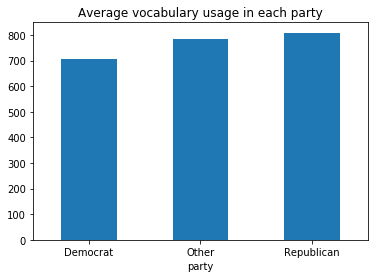

In [7]:
avg_vocab = InauguralSpeeches.groupby(['party'])['vocab'].mean()
avg_vocab.plot.bar(x='party',y='mean',rot = 0)
print(avg_vocab)
plt.title("Average vocabulary usage in each party")
plt.show()

<b>Comparing the average vocabulary of the presidents among democrats, republicans and others we see that republicans have the highest vocabulary usage</b>

#### Barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in their inagural speeches

In [8]:
InauguralSpeeches['presidentyear'] = InauguralSpeeches['year'].astype('str') + InauguralSpeeches['president']

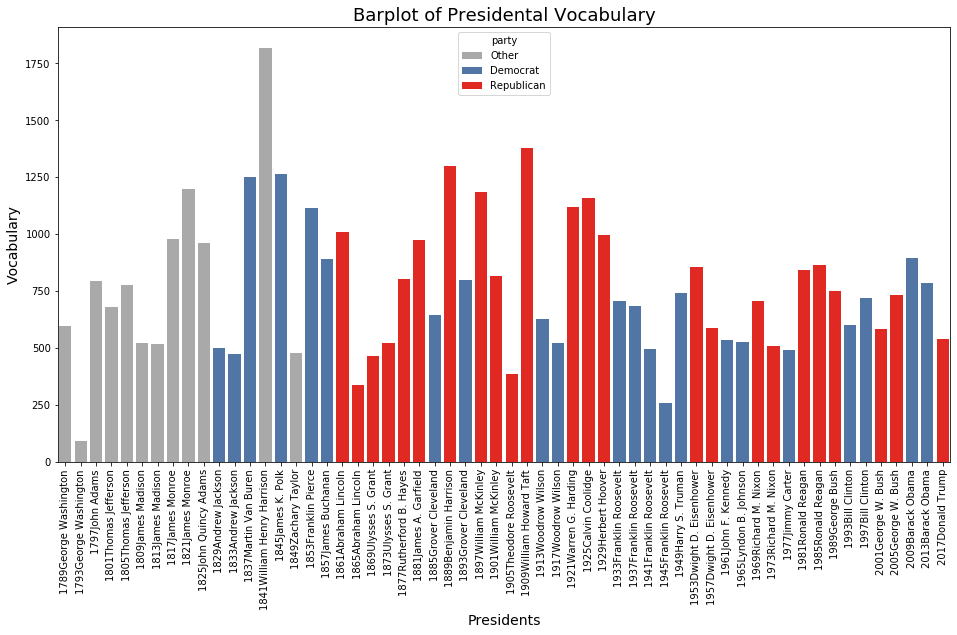

In [9]:
colors = ["#A9A9A9","#4374B3","#FF0B04"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = "presidentyear",y = "vocab", hue="party",
                 data=InauguralSpeeches, dodge = False,ci=None)
ax.set_title('Barplot of Presidental Vocabulary', fontsize=18)
ax.set_ylabel('Vocabulary', fontsize=14)
ax.set_xlabel('Presidents', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### five most frequently used words (exclusive of stop words) used by each president

In [10]:
InauguralSpeeches[['president','freq_words']]

,president,freq_words
0,George Washington,"[every, government, public, may, present]"
1,George Washington,"[shall, oath, fellow, citizens, called]"
2,John Adams,"[people, government, may, nations, country]"
3,Thomas Jefferson,"[government, us, may, let, shall]"
4,Thomas Jefferson,"[public, citizens, may, fellow, state]"
5,James Madison,"[nations, public, country, well, peace]"
6,James Madison,"[war, country, united, every, british]"
7,James Monroe,"[great, states, government, people, us]"
8,James Monroe,"[great, states, would, united, war]"
9,John Quincy Adams,"[union, government, upon, rights, peace]"


In [11]:
#Creating two seperate lists to identify most frequent words used by presidents in republic and democratic parties.
republican_word_list=[]
democrat_word_list=[]
for i in range(0, len(InauguralSpeeches)):
    if InauguralSpeeches.iloc[i]['party']=='Republican':
        republican_word_list=republican_word_list+InauguralSpeeches.iloc[i]['freq_words']
    elif InauguralSpeeches.iloc[i]['party']=='Democrat':
        democrat_word_list=democrat_word_list+InauguralSpeeches.iloc[i]['freq_words']

In [12]:
print(list(set(democrat_word_list)-set(republican_word_list)))

['know', 'strength', 'change', 'action', 'today', 'learned', 'sides', 'century', 'together', 'purpose', 'men', 'would', 'power', 'national', 'leadership', 'time', 'spirit', 'democracy', 'institutions']


Few words that are used by democrats but not used by republicans.

### Barplots of Democratic, Republican, and other presidents 

In [17]:
def plot_sentiment(party,color):
    InauguralSpeeches[InauguralSpeeches['party']==party].\
    plot(kind='bar',x='president',y='sentiment',color = color)
    plt.title("Sentiment Score of presidents from " + party + " party")
    #plt.rcParams["figure.figsize"] = (8,10)
    #axes = plt.gca()
    #plt.rcParams.update({'font.size': 12})
    plt.legend().set_visible(False)

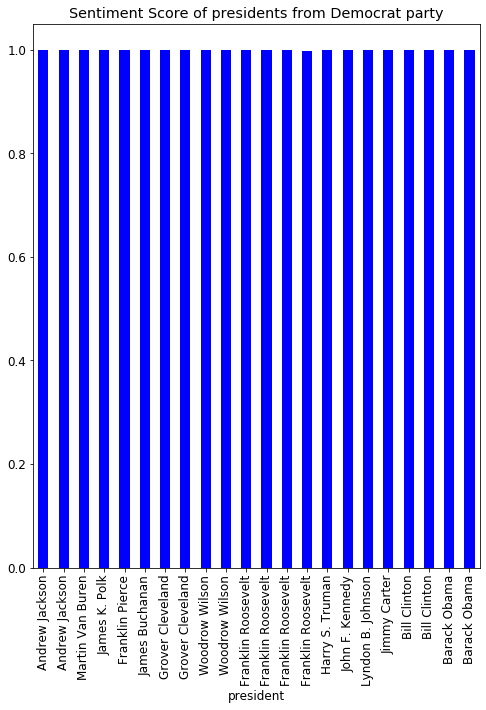

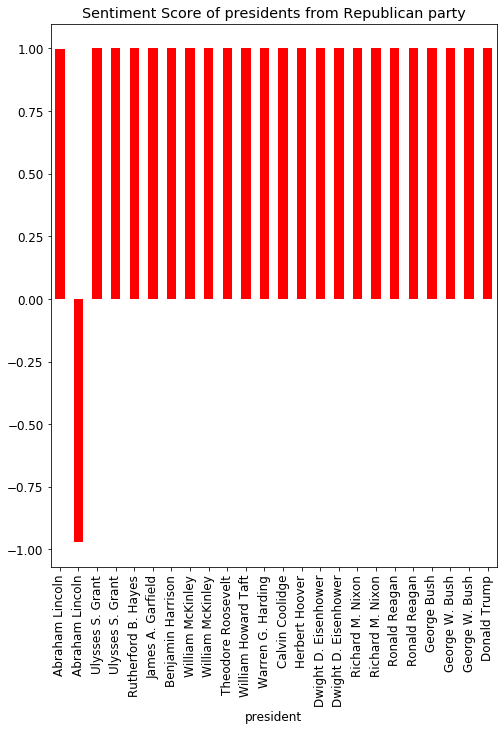

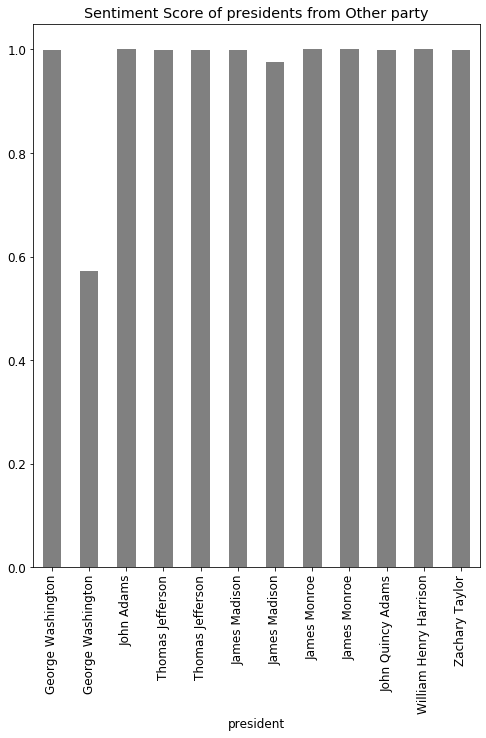

In [18]:
plot_sentiment('Democrat','blue')
plot_sentiment('Republican','red')
plot_sentiment('Other','grey')

### Top three presidents with the highest positive sentiment in each group

In [15]:
# Dropping duplicate rows with same president name, parties and sentiment polarity.
top3presidents = InauguralSpeeches.drop_duplicates(['president', 'party', 'sentiment'])

# Top three presidents with the highest positive sentiment in each group
sorted_data = top3presidents.sort_values(by=['sentiment', 'party'],ascending=False).\
groupby('party')['president', 'party', 'sentiment'].head(3)
sorted_data.style.hide_index()

president,party,sentiment
Rutherford B. Hayes,Republican,1
Benjamin Harrison,Republican,1
William McKinley,Republican,1
John Adams,Other,1
James Monroe,Other,1
William Henry Harrison,Other,1
James K. Polk,Democrat,1
Franklin Pierce,Democrat,1
Harry S. Truman,Democrat,1


In [16]:
InauguralSpeeches.to_csv(r'corpus.csv', index = False)